<a href="https://colab.research.google.com/github/AlessiaLeoFolliero/BDM/blob/main/Copia_di_Leaves_seconda_prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset:

In [1]:
import pandas as pd
import tensorflow
import keras
import pandas
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import subprocess
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "alessialeofolliero"
os.environ['KAGGLE_KEY'] = "4f468c4b65651a32ed5e320a2d8b06b3"
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification


100% 6.56G/6.56G [05:25<00:00, 24.1MB/s]
100% 6.56G/6.56G [05:25<00:00, 21.7MB/s]


In [3]:
#unzip
!unzip -q /content/plant-leaves-for-image-classification.zip

Cleaning the dataset: Delete all the diseased image

In [4]:
directory_test = "/content/Plants_2/test"
subprocess.call(['find', directory_test, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [5]:
directory_train = "/content/Plants_2/train"
subprocess.call(['find', directory_train, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [6]:
directory_valid = "/content/Plants_2/valid"
subprocess.call(['find', directory_valid, '-type', 'd', '-name', '*diseased*', '-exec', 'rm', '-r', '{}', ';'])

1

In [7]:
dir='/content/Plants_2/train/Alstonia Scholaris healthy (P2b)/0003_0011.JPG'
with Image.open(dir) as img:
     img.load()

In [8]:
img.size

(6000, 4000)

In [9]:
img.format

'JPEG'

In [10]:
img.mode

'RGB'

Showing the image with matplotlib

In [11]:
import matplotlib.pyplot as plt

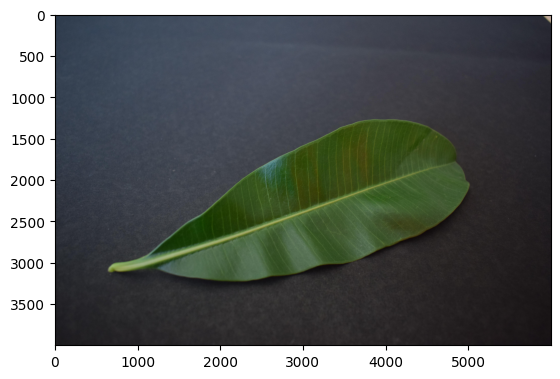

In [12]:
plt.imshow(img)
plt.show()

Resizing the image

In [13]:
from PIL import Image
import os

# Specify the directory where your images are located
root_directory = '/content/Plants_2/test'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/test_r'

# Function to resize an image
def resize_image(input_path, output_path, size):
    try:
        img = Image.open(input_path)
        img = img.resize(size)
        img.save(output_path)
        print(f'Resized: {output_path}')
    except Exception as e:
        print(f'Error resizing {input_path}: {e}')

# Function to resize images in a directory and its subdirectories
def resize_images_in_directory(directory, output_dir, size=(100, 100)):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resize_image(input_path, output_path, size)

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0010.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0007.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0008.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0009.JPG
Resized: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0006.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0004.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0005.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0002.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0001.JPG
Resized: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0003.JPG
Resized: /content/Plants_2/test_r/Basil healthy (P8)/0008_0001.JPG
Resized: /content/Plants_2/test_r/Basil healthy (P8)/0008_0005.JPG
Resized: /content/Plants_2/test_r/Basil healthy (P8)/0008_0002.JPG
Resized: /content/Plants_2/test_r/Basil healthy (P8)/0008_0003.JPG
Resized: /content/Plants_2/test_r/Basil healthy (P8)

In [14]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/valid'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/valid_r'

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0003.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0002.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0001.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0005.JPG
Resized: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0004.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0008.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0009.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0006.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0007.JPG
Resized: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0010.JPG
Resized: /content/Plants_2/valid_r/Basil healthy (P8)/0008_0006.JPG
Resized: /content/Plants_2/valid_r/Basil healthy (P8)/0008_0008.JPG
Resized: /content/Plants_2/valid_r/Basil healthy (P8)/0008_0007.JPG
Resized: /content/Plants_2/valid_r/Basil healthy (P8)/0008_0009.JPG
Resized: /content/Plants_2/valid_r/Bas

In [15]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/train'

# Specify the output directory where resized images will be saved
output_directory = '/content/Plants_2/train_r'

# Call the function with the root directory and desired output directory
resize_images_in_directory(root_directory, output_directory, size=(256, 256))

Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0199.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0222.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0031.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0219.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0157.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0079.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0111.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0252.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0140.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0046.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0217.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0029.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0088.JPG
Resized: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0025.JPG
Resized: /content/Plants_2/train_r

Convert Imagese to greyscale

In [16]:
from PIL import Image
import os

# Specify the directory where your images are located
root_directory = '/content/Plants_2/train_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/train_r'

# Function to convert an image to grayscale
def convert_to_grayscale(input_path, output_path):
    try:
        img = Image.open(input_path)
        img = img.convert("RGB")
        img = img.convert('L')  # Convert to grayscale
        img.save(output_path)
        print(f'Converted to grayscale: {output_path}')
    except Exception as e:
        print(f'Error converting {input_path} to grayscale: {e}')

# Function to convert images to grayscale in a directory and its subdirectories
def convert_images_to_grayscale_in_directory(directory, output_dir):
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has a common image file extension (you can extend this list)
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, directory)
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                convert_to_grayscale(input_path, output_path)

# Call the function with the root directory and desired output directory
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0199.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0222.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0031.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0219.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0157.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0079.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0111.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0252.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0140.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0046.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0217.JPG
Converted to grayscale: /content/Plants_2/train_r/Gauva healthy (P3a)/0004_0

In [17]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/test_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/test_r'

# Call the function with the root directory and desired output directory
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0010.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0007.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0008.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0009.JPG
Converted to grayscale: /content/Plants_2/test_r/Gauva healthy (P3a)/0004_0006.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0004.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0005.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0002.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0001.JPG
Converted to grayscale: /content/Plants_2/test_r/Jamun healthy (P5a)/0005_0003.JPG
Converted to grayscale: /content/Plants_2/test_r/Basil healthy (P8)/0008_0001.JPG
Converted to grayscale: /content/Plants_2/test_r/Basil healthy (P8)/0008_0005.JPG
Conver

In [18]:
# Specify the directory where your images are located
root_directory = '/content/Plants_2/valid_r'

# Specify the output directory where grayscale images will be saved
output_directory = '/content/Plants_2/valid_r'

# Call the function with the root directory and desired output directory
convert_images_to_grayscale_in_directory(root_directory, output_directory)

Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0003.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0002.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0001.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0005.JPG
Converted to grayscale: /content/Plants_2/valid_r/Gauva healthy (P3a)/0004_0004.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0008.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0009.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0006.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0007.JPG
Converted to grayscale: /content/Plants_2/valid_r/Jamun healthy (P5a)/0005_0010.JPG
Converted to grayscale: /content/Plants_2/valid_r/Basil healthy (P8)/0008_0006.JPG
Converted to grayscale: /content/Plants_2/valid_r/Basil healthy (P8)/0008_000

Data normalization and augmentation

In [49]:
# Data normalization and augmentation
tv_datagenerat = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to the range [0, 1]
    zoom_range=0.2,
    horizontal_flip=False
)
test_datagen=ImageDataGenerator(rescale=1.0/255)

Train and validation augmentation and normalization

In [50]:
# Load and preprocess the training data
train_generator = tv_datagenerat.flow_from_directory(
    directory=r'/content/Plants_2/train_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    seed=234,
    #class_mode='categorical'  # 'categorical' for multi-class classification
)

valid_generator=tv_datagenerat.flow_from_directory(
    directory=r'/content/Plants_2/valid_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    seed=234,
    #class_mode='categorical'
)


Found 2163 images belonging to 11 classes.
Found 55 images belonging to 11 classes.


Test normalization

In [51]:
test_generat=test_datagen.flow_from_directory(
    directory=r'/content/Plants_2/test_r',
    target_size=(256,256),
    color_mode='grayscale',
    batch_size=32,
    seed=234,
    class_mode='sparse'  # 'categorical' for multi-class classification
)

Found 55 images belonging to 11 classes.


Reprint the image to see how did it change

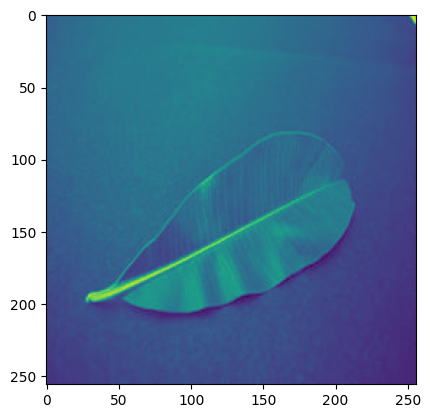

In [52]:
dir='//content/Plants_2/train_r/Alstonia Scholaris healthy (P2b)/0003_0011.JPG'
with Image.open(dir) as img:
     img.load()
plt.imshow(img)
plt.show()

In [53]:
img.size

(256, 256)

In [24]:
img.format

'JPEG'

In [25]:
img.mode

'L'

In [26]:
# Check if the image is in grayscale
is_grayscale = img.mode == "L"

if is_grayscale:
    print("The image is in grayscale.")
else:
    print("The image is not in grayscale.")

The image is in grayscale.


Construction on CCN

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
!pip install keras-tuner
import keras_tuner
from keras_tuner.tuners import Hyperband
from keras_tuner import Hyperband
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import keras
from keras.layers import LeakyReLU

In [45]:
#defining model
def My_Cnn(param):
  model=Sequential()

  #adding convolution layer
  model.add(Conv2D(filters=param.Int('conv1_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  #adding pooling layer
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same'))
  #Dropoutlayer
  model.add(Dropout(param.Float('drop_1', min_value=0.0, max_value=0.3, step=0.05)))


  ###Second Layer
  model.add(Conv2D(filters=param.Int('conv2_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model.add(Dropout(param.Float('drop_2', min_value=0.0, max_value=0.3, step=0.05)))

  ###Third Layer
  model.add(Conv2D(filters=param.Int('conv3_filter', min_value=32, max_value=128, step=16),kernel_size=(3,3),activation='relu',input_shape=(256,256,1),padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), padding='same'))
  model.add(Dropout(param.Float('drop_3', min_value=0.0, max_value=0.3, step=0.05)))

  #adding fully connected layer
  model.add(Flatten())
  model.add(Dense(units=param.Int('units', min_value=32, max_value=128, step=16),activation='relu'))
  model.add(Dropout(param.Float('drop_c', min_value=0.0, max_value=0.3, step=0.05)))

  #adding output layer
  model.add(Dense(11,activation='softmax'))

  #compiling the model
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [ ]:
!pip install -q -U keras-tuner

Hyperparameter tuning with keras tuner

In [55]:
tuner_r = keras_tuner.RandomSearch(My_Cnn,
  objective='val_accuracy',
  max_trials=3,
  executions_per_trial=3,
  directory='keras_tuner',
  project_name='leaves',
  overwrite=True)

In [56]:
tuner_h = keras_tuner.Hyperband(My_Cnn,
objective='val_accuracy',
max_epochs=10,
executions_per_trial=3,
directory='keras_tuner',
project_name='leaves',
overwrite=True)

Performing

In [ ]:
#perform the hyperparameter search, training with 8
tuner_r.search(train_generator, validation_data = valid_generator, epochs=8)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |conv1_filter
0.1               |0.1               |drop_1
48                |48                |conv2_filter
0.2               |0.2               |drop_2
96                |96                |conv3_filter
0.15              |0.15              |drop_3
112               |112               |units
0.2               |0.2               |drop_c

Epoch 1/8
 6/68 [=>............................] - ETA: 23s - loss: 2.3911 - accuracy: 0.0990

68/68 [==============================] - 32s 390ms/step - loss: 1.9586 - accuracy: 0.3292 - val_loss: 1.4731 - val_accuracy: 0.5091
Epoch 2/8
68/68 [==============================] - 24s 346ms/step - loss: 1.3210 - accuracy: 0.5622 - val_loss: 1.1477 - val_accuracy: 0.5273
Epoch 3/8
68/68 [==============================] - 23s 341ms/step - loss: 1.0189 - accuracy: 0.6755 - val_loss: 0.8288 - val_accuracy: 0.6727
Epoch 4/8
68/68 [==============================] - 23s 342ms/step - loss: 0.9185 - accuracy: 0.7106 - val_loss: 0.7430 - val_accuracy: 0.7636
Epoch 5/8
39/68 [================>.............] - ETA: 9s - loss: 0.7919 - accuracy: 0.7580 

In [33]:
best_hps=tuner_r.get_best_hyperparameters()[0]
best_hps.get_config()["values"]

{'conv1_filter': 96,
 'drop_1': 0.1,
 'conv2_filter': 112,
 'drop_2': 0.05,
 'conv3_filter': 112,
 'drop_3': 0.05,
 'units': 112,
 'drop_c': 0.2}

Model with best parameters

In [34]:
model=tuner_r.get_best_models(num_models=1)[0]

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 96)      960       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 96)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 96)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 112)     96880     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 112)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 112)       0

Train the model

In [ ]:
mm=model.fit(train_generator, validation_data = valid_generator, epochs=10)

Epoch 1/10
68/68 [==============================] - 20s 206ms/step - loss: 0.4947 - accuracy: 0.8516 - val_loss: 0.5484 - val_accuracy: 0.8182
Epoch 2/10
68/68 [==============================] - 14s 201ms/step - loss: 0.4476 - accuracy: 0.8613 - val_loss: 0.4323 - val_accuracy: 0.8909
Epoch 3/10
68/68 [==============================] - 14s 205ms/step - loss: 0.3694 - accuracy: 0.8770 - val_loss: 0.4620 - val_accuracy: 0.8545
Epoch 4/10
68/68 [==============================] - 15s 216ms/step - loss: 0.3039 - accuracy: 0.9015 - val_loss: 0.3382 - val_accuracy: 0.9091
Epoch 5/10
68/68 [==============================] - 14s 200ms/step - loss: 0.2835 - accuracy: 0.9098 - val_loss: 0.3913 - val_accuracy: 0.8545
Epoch 6/10
68/68 [==============================] - 14s 210ms/step - loss: 0.2328 - accuracy: 0.9288 - val_loss: 0.4950 - val_accuracy: 0.8909
Epoch 7/10
68/68 [==============================] - 14s 198ms/step - loss: 0.2230 - accuracy: 0.9283 - val_loss: 0.4468 - val_accuracy: 0.8364

In [ ]:
mt1=model.evaluate(test_generat)

2/2 [==============================] - 0s 23ms/step - loss: 0.3809 - accuracy: 0.8909


Loss and validation graphs

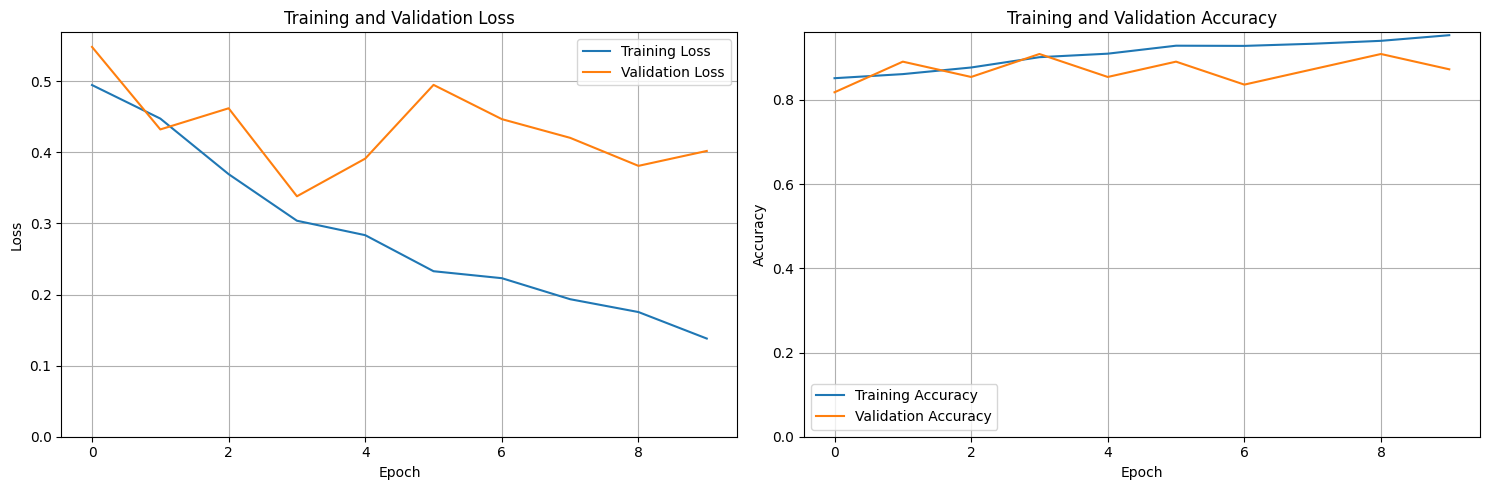

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and validation accuracy from the training history
loss = mm.history['loss']
val_loss = mm.history['val_loss']
accuracy = mm.history['accuracy']
val_accuracy = mm.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()


Then after 30 epochs

In [36]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3,start_from_epoch=20)
mm_20=model.fit(train_generator, validation_data = valid_generator, epochs=40,callbacks=[early_stop],verbose=1)

Epoch 1/30
68/68 [==============================] - 23s 308ms/step - loss: 0.4752 - accuracy: 0.8377 - val_loss: 0.6058 - val_accuracy: 0.8364
Epoch 2/30
68/68 [==============================] - 21s 301ms/step - loss: 0.3934 - accuracy: 0.8710 - val_loss: 0.6138 - val_accuracy: 0.7636
Epoch 3/30
68/68 [==============================] - 21s 302ms/step - loss: 0.3664 - accuracy: 0.8867 - val_loss: 0.6620 - val_accuracy: 0.8000
Epoch 4/30
68/68 [==============================] - 21s 305ms/step - loss: 0.3650 - accuracy: 0.8830 - val_loss: 0.6331 - val_accuracy: 0.8364
Epoch 5/30
68/68 [==============================] - 24s 348ms/step - loss: 0.3041 - accuracy: 0.9029 - val_loss: 0.4040 - val_accuracy: 0.8727
Epoch 6/30
68/68 [==============================] - 25s 356ms/step - loss: 0.2553 - accuracy: 0.9191 - val_loss: 0.5872 - val_accuracy: 0.8182
Epoch 7/30
68/68 [==============================] - 24s 348ms/step - loss: 0.2688 - accuracy: 0.9098 - val_loss: 0.4764 - val_accuracy: 0.8727

On the test

In [44]:
mm1=model.evaluate(test_generat)


2/2 [==============================] - 0s 49ms/step - loss: 0.5034 - accuracy: 0.8182


In [38]:
print('Test loss:', mm1[0])
print('Test accuracy:', mm1[1])


Test loss: 0.5033510327339172
Test accuracy: 0.8181818127632141


Plot

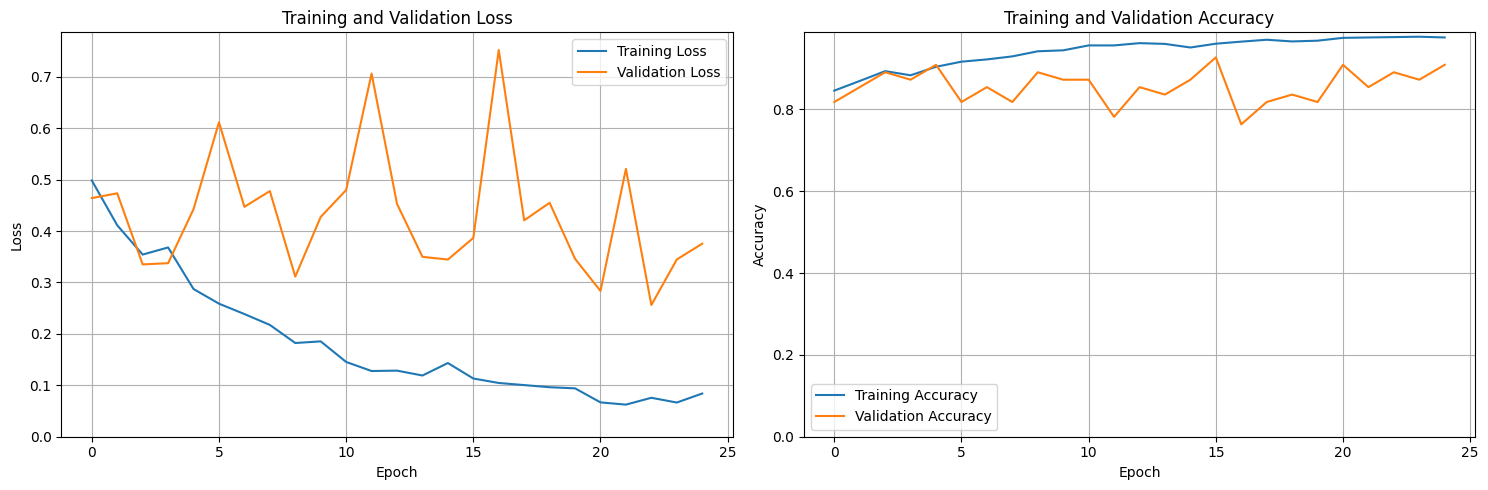

In [ ]:
# Extract loss and validation accuracy from the training history
loss = mm_20.history['loss']
val_loss = mm_20.history['val_loss']
accuracy = mm_20.history['accuracy']
val_accuracy = mm_20.history['val_accuracy']

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# First plot (Loss)
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Second plot (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

# Adjust the layout to prevent overlapping and avoid overlapping
plt.tight_layout()
plt.show()

Model performance

In [32]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

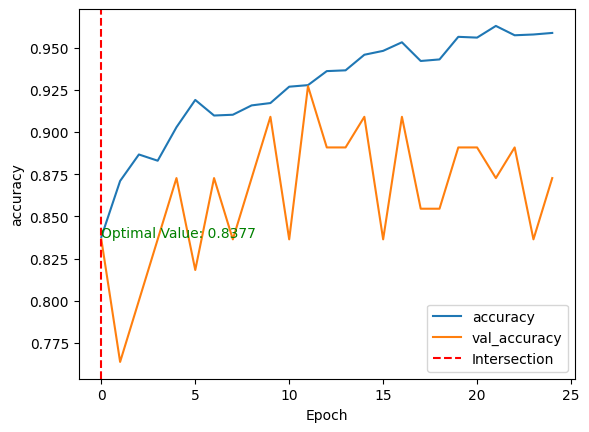

In [39]:
show_performance_curve(mm_20, 'accuracy', 'accuracy')

Now we want to understand what my model is good at predicting and what it is not.

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

2/2 [==============================] - 0s 49ms/step


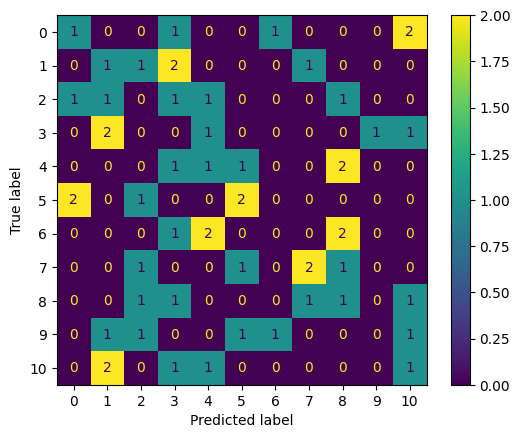

In [43]:
test_predictions = model.predict(test_generat)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = test_generat.classes

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()